In [2]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


In [ ]:
#https://github.com/APMonitor/data_science/blob/master/06.%20Regression.ipynb

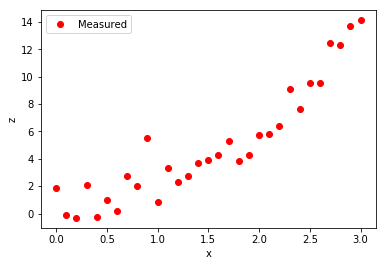

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
n = 31
x = np.linspace(0,3,n)
z = np.array([1.89,-0.12,-0.32,2.11,-0.25,1.01,0.17,2.75,2.01,5.5,\
     0.87,3.31,2.29,2.73,3.67,3.92,4.29,5.27,3.85,4.26,\
     5.75,5.82,6.36,9.13,7.61,9.52,9.53,12.49,12.29,13.7,14.12])
data = pd.DataFrame(np.vstack((x,z)).T,columns=['x','z'])
plt.plot(x,z,'ro',label='Measured')
plt.xlabel('x'); plt.ylabel('z'); plt.legend()


Slope, Intercept:[ 4.22197581 -1.31586694]


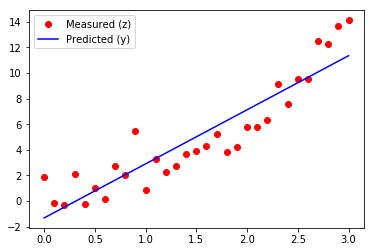

In [35]:
p1 = np.polyfit(x,z,1)

print('Slope, Intercept:' + str(p1))

plt.plot(x,z,'ro',label='Measured (z)')
plt.plot(x,np.polyval(p1,x),'b-',label='Predicted (y)')
plt.legend(); plt.show()

In [36]:
from sklearn.metrics import r2_score
meas  = [3.0, 2.0, 1.9, 7.1]
model = [2.5, 1.8, 2.0, 8.0]
r2_score(meas, model)

0.9384017758046614

In [37]:

import statsmodels.api as sm
xc = sm.add_constant(x)
model = sm.OLS(z,xc).fit()
predictions = model.predict(xc)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           5.41e-13
Time:                        14:49:43   Log-Likelihood:                -59.683
No. Observations:                  31   AIC:                             123.4
Df Residuals:                      29   BIC:                             126.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3159      0.602     -2.187      0.037      -2.546      -0.085
x1             4.2220      0.344     12.256      0.000       3.517       4.926
==============================================================================
Omnibus:                        3.249   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                2.351
Skew:                           0.511   Prob(JB):                        0.309
Kurtosis:                       2.118   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p = [ 0.88676222 -0.93776695]


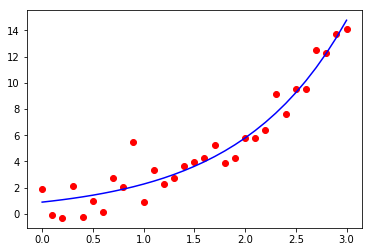

In [43]:

from scipy.optimize import curve_fit
def f(x,a,b):
    return a * np.exp(b*x)
p, pcov = curve_fit(f,x,z)
print('p = '+str(p))
plt.plot(x,z,'ro')
plt.plot(x,f(x,*p),'b-')
plt.show()

<IPython.core.display.Javascript object>


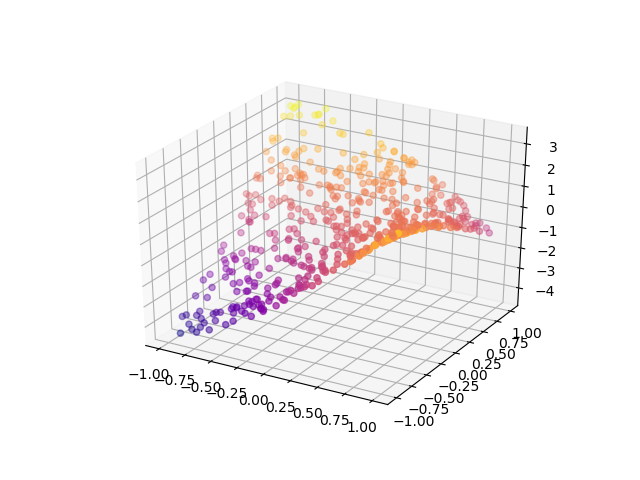

In [47]:
#Machine Learning section

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import math
def f(x,y):
    return 2*math.cos(x)*y + x*math.cos(y) - 3*x*y

n = 500
x = (np.random.rand(n)-0.5)*2.0
y = (np.random.rand(n)-0.5)*2.0
z = np.empty_like(x)
for i in range(n):
    z[i] = f(x[i],y[i])
data = pd.DataFrame(np.vstack((x,y,z)).T,columns=['x','y','z'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=z,cmap='plasma')
plt.show()

## Deep learning based on https://apmonitor.com/do/index.php/Main/DeepLearning



In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt  

# generate training data
x = np.linspace(0.0,2*np.pi,20)
y = np.sin(x)
# save training data to file
data = np.vstack((x,y)).T
np.savetxt('train_data.csv',data,header='x,y',comments='',delimiter=',')

# generate test data
x = np.linspace(0.0,2*np.pi,100)
y = np.sin(x)
# save test data to file
data = np.vstack((x,y)).T
np.savetxt('test_data.csv',data,header='x,y',comments='',delimiter=',')

In [5]:
# load training and test data with pandas
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# scale values to 0 to 1 for the ANN to work well
s = MinMaxScaler(feature_range=(0,1))

# scale training and test data
sc_train = s.fit_transform(train_df)
sc_test = s.transform(test_df)

# print scaling adjustments
print('Scalar multipliers')
print(s.scale_)
print('Scalar minimum')
print(s.min_)

# convert scaled values back to dataframe
sc_train_df = pd.DataFrame(sc_train, columns=train_df.columns.values)
sc_test_df = pd.DataFrame(sc_test, columns=test_df.columns.values)

# save scaled values to CSV files
sc_train_df.to_csv('train_scaled.csv', index=False)
sc_test_df.to_csv('test_scaled.csv', index=False)

Scalar multipliers
[0.15915494 0.50171361]
Scalar minimum
[0.  0.5]


In [10]:
# create neural network model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.add(Dense(2, activation='linear'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")

# load training data
train_df = pd.read_csv("train_scaled.csv")
X1 = train_df.drop('y', axis=1).values
Y1 = train_df[['y']].values

# train the model
model.fit(X1,Y1,epochs=5000,verbose=2,shuffle=True)

# Save the model to hard drive
#model.save('model.h5')

Epoch 1/5000
 - 0s - loss: 0.4446
Epoch 2/5000
 - 0s - loss: 0.4412
Epoch 3/5000
 - 0s - loss: 0.4384
Epoch 4/5000
 - 0s - loss: 0.4353
Epoch 5/5000
 - 0s - loss: 0.4322
Epoch 6/5000
 - 0s - loss: 0.4291
Epoch 7/5000
 - 0s - loss: 0.4260
Epoch 8/5000
 - 0s - loss: 0.4229
Epoch 9/5000
 - 0s - loss: 0.4197
Epoch 10/5000
 - 0s - loss: 0.4166
Epoch 11/5000
 - 0s - loss: 0.4136
Epoch 12/5000
 - 0s - loss: 0.4106
Epoch 13/5000
 - 0s - loss: 0.4076
Epoch 14/5000
 - 0s - loss: 0.4046
Epoch 15/5000
 - 0s - loss: 0.4017
Epoch 16/5000
 - 0s - loss: 0.3988
Epoch 17/5000
 - 0s - loss: 0.3959
Epoch 18/5000
 - 0s - loss: 0.3932
Epoch 19/5000
 - 0s - loss: 0.3904
Epoch 20/5000
 - 0s - loss: 0.3876
Epoch 21/5000
 - 0s - loss: 0.3849
Epoch 22/5000
 - 0s - loss: 0.3823
Epoch 23/5000
 - 0s - loss: 0.3796
Epoch 24/5000
 - 0s - loss: 0.3770
Epoch 25/5000
 - 0s - loss: 0.3745
Epoch 26/5000
 - 0s - loss: 0.3720
Epoch 27/5000
 - 0s - loss: 0.3695
Epoch 28/5000
 - 0s - loss: 0.3671
Epoch 29/5000
 - 0s - loss: 0

Epoch 232/5000
 - 0s - loss: 0.1340
Epoch 233/5000
 - 0s - loss: 0.1336
Epoch 234/5000
 - 0s - loss: 0.1332
Epoch 235/5000
 - 0s - loss: 0.1328
Epoch 236/5000
 - 0s - loss: 0.1324
Epoch 237/5000
 - 0s - loss: 0.1320
Epoch 238/5000
 - 0s - loss: 0.1316
Epoch 239/5000
 - 0s - loss: 0.1312
Epoch 240/5000
 - 0s - loss: 0.1308
Epoch 241/5000
 - 0s - loss: 0.1305
Epoch 242/5000
 - 0s - loss: 0.1301
Epoch 243/5000
 - 0s - loss: 0.1297
Epoch 244/5000
 - 0s - loss: 0.1293
Epoch 245/5000
 - 0s - loss: 0.1289
Epoch 246/5000
 - 0s - loss: 0.1286
Epoch 247/5000
 - 0s - loss: 0.1282
Epoch 248/5000
 - 0s - loss: 0.1278
Epoch 249/5000
 - 0s - loss: 0.1275
Epoch 250/5000
 - 0s - loss: 0.1271
Epoch 251/5000
 - 0s - loss: 0.1267
Epoch 252/5000
 - 0s - loss: 0.1264
Epoch 253/5000
 - 0s - loss: 0.1260
Epoch 254/5000
 - 0s - loss: 0.1256
Epoch 255/5000
 - 0s - loss: 0.1253
Epoch 256/5000
 - 0s - loss: 0.1249
Epoch 257/5000
 - 0s - loss: 0.1245
Epoch 258/5000
 - 0s - loss: 0.1242
Epoch 259/5000
 - 0s - loss:

Epoch 460/5000
 - 0s - loss: 0.0584
Epoch 461/5000
 - 0s - loss: 0.0584
Epoch 462/5000
 - 0s - loss: 0.0583
Epoch 463/5000
 - 0s - loss: 0.0582
Epoch 464/5000
 - 0s - loss: 0.0581
Epoch 465/5000
 - 0s - loss: 0.0580
Epoch 466/5000
 - 0s - loss: 0.0580
Epoch 467/5000
 - 0s - loss: 0.0579
Epoch 468/5000
 - 0s - loss: 0.0578
Epoch 469/5000
 - 0s - loss: 0.0578
Epoch 470/5000
 - 0s - loss: 0.0577
Epoch 471/5000
 - 0s - loss: 0.0576
Epoch 472/5000
 - 0s - loss: 0.0576
Epoch 473/5000
 - 0s - loss: 0.0575
Epoch 474/5000
 - 0s - loss: 0.0575
Epoch 475/5000
 - 0s - loss: 0.0574
Epoch 476/5000
 - 0s - loss: 0.0574
Epoch 477/5000
 - 0s - loss: 0.0573
Epoch 478/5000
 - 0s - loss: 0.0573
Epoch 479/5000
 - 0s - loss: 0.0573
Epoch 480/5000
 - 0s - loss: 0.0572
Epoch 481/5000
 - 0s - loss: 0.0572
Epoch 482/5000
 - 0s - loss: 0.0571
Epoch 483/5000
 - 0s - loss: 0.0571
Epoch 484/5000
 - 0s - loss: 0.0571
Epoch 485/5000
 - 0s - loss: 0.0570
Epoch 486/5000
 - 0s - loss: 0.0570
Epoch 487/5000
 - 0s - loss:

Epoch 688/5000
 - 0s - loss: 0.0559
Epoch 689/5000
 - 0s - loss: 0.0559
Epoch 690/5000
 - 0s - loss: 0.0559
Epoch 691/5000
 - 0s - loss: 0.0558
Epoch 692/5000
 - 0s - loss: 0.0558
Epoch 693/5000
 - 0s - loss: 0.0558
Epoch 694/5000
 - 0s - loss: 0.0558
Epoch 695/5000
 - 0s - loss: 0.0558
Epoch 696/5000
 - 0s - loss: 0.0558
Epoch 697/5000
 - 0s - loss: 0.0558
Epoch 698/5000
 - 0s - loss: 0.0558
Epoch 699/5000
 - 0s - loss: 0.0558
Epoch 700/5000
 - 0s - loss: 0.0558
Epoch 701/5000
 - 0s - loss: 0.0558
Epoch 702/5000
 - 0s - loss: 0.0558
Epoch 703/5000
 - 0s - loss: 0.0558
Epoch 704/5000
 - 0s - loss: 0.0558
Epoch 705/5000
 - 0s - loss: 0.0558
Epoch 706/5000
 - 0s - loss: 0.0558
Epoch 707/5000
 - 0s - loss: 0.0558
Epoch 708/5000
 - 0s - loss: 0.0558
Epoch 709/5000
 - 0s - loss: 0.0557
Epoch 710/5000
 - 0s - loss: 0.0557
Epoch 711/5000
 - 0s - loss: 0.0557
Epoch 712/5000
 - 0s - loss: 0.0557
Epoch 713/5000
 - 0s - loss: 0.0557
Epoch 714/5000
 - 0s - loss: 0.0557
Epoch 715/5000
 - 0s - loss:

Epoch 916/5000
 - 0s - loss: 0.0536
Epoch 917/5000
 - 0s - loss: 0.0536
Epoch 918/5000
 - 0s - loss: 0.0536
Epoch 919/5000
 - 0s - loss: 0.0535
Epoch 920/5000
 - 0s - loss: 0.0535
Epoch 921/5000
 - 0s - loss: 0.0535
Epoch 922/5000
 - 0s - loss: 0.0535
Epoch 923/5000
 - 0s - loss: 0.0535
Epoch 924/5000
 - 0s - loss: 0.0534
Epoch 925/5000
 - 0s - loss: 0.0534
Epoch 926/5000
 - 0s - loss: 0.0534
Epoch 927/5000
 - 0s - loss: 0.0534
Epoch 928/5000
 - 0s - loss: 0.0534
Epoch 929/5000
 - 0s - loss: 0.0533
Epoch 930/5000
 - 0s - loss: 0.0533
Epoch 931/5000
 - 0s - loss: 0.0533
Epoch 932/5000
 - 0s - loss: 0.0533
Epoch 933/5000
 - 0s - loss: 0.0533
Epoch 934/5000
 - 0s - loss: 0.0532
Epoch 935/5000
 - 0s - loss: 0.0532
Epoch 936/5000
 - 0s - loss: 0.0532
Epoch 937/5000
 - 0s - loss: 0.0532
Epoch 938/5000
 - 0s - loss: 0.0532
Epoch 939/5000
 - 0s - loss: 0.0531
Epoch 940/5000
 - 0s - loss: 0.0531
Epoch 941/5000
 - 0s - loss: 0.0531
Epoch 942/5000
 - 0s - loss: 0.0531
Epoch 943/5000
 - 0s - loss:

Epoch 1140/5000
 - 0s - loss: 0.0437
Epoch 1141/5000
 - 0s - loss: 0.0436
Epoch 1142/5000
 - 0s - loss: 0.0435
Epoch 1143/5000
 - 0s - loss: 0.0435
Epoch 1144/5000
 - 0s - loss: 0.0434
Epoch 1145/5000
 - 0s - loss: 0.0433
Epoch 1146/5000
 - 0s - loss: 0.0432
Epoch 1147/5000
 - 0s - loss: 0.0431
Epoch 1148/5000
 - 0s - loss: 0.0430
Epoch 1149/5000
 - 0s - loss: 0.0429
Epoch 1150/5000
 - 0s - loss: 0.0428
Epoch 1151/5000
 - 0s - loss: 0.0427
Epoch 1152/5000
 - 0s - loss: 0.0426
Epoch 1153/5000
 - 0s - loss: 0.0425
Epoch 1154/5000
 - 0s - loss: 0.0424
Epoch 1155/5000
 - 0s - loss: 0.0423
Epoch 1156/5000
 - 0s - loss: 0.0422
Epoch 1157/5000
 - 0s - loss: 0.0421
Epoch 1158/5000
 - 0s - loss: 0.0420
Epoch 1159/5000
 - 0s - loss: 0.0419
Epoch 1160/5000
 - 0s - loss: 0.0418
Epoch 1161/5000
 - 0s - loss: 0.0417
Epoch 1162/5000
 - 0s - loss: 0.0416
Epoch 1163/5000
 - 0s - loss: 0.0415
Epoch 1164/5000
 - 0s - loss: 0.0414
Epoch 1165/5000
 - 0s - loss: 0.0413
Epoch 1166/5000
 - 0s - loss: 0.0412
E

Epoch 1362/5000
 - 0s - loss: 0.0149
Epoch 1363/5000
 - 0s - loss: 0.0148
Epoch 1364/5000
 - 0s - loss: 0.0147
Epoch 1365/5000
 - 0s - loss: 0.0146
Epoch 1366/5000
 - 0s - loss: 0.0145
Epoch 1367/5000
 - 0s - loss: 0.0144
Epoch 1368/5000
 - 0s - loss: 0.0143
Epoch 1369/5000
 - 0s - loss: 0.0142
Epoch 1370/5000
 - 0s - loss: 0.0141
Epoch 1371/5000
 - 0s - loss: 0.0140
Epoch 1372/5000
 - 0s - loss: 0.0139
Epoch 1373/5000
 - 0s - loss: 0.0138
Epoch 1374/5000
 - 0s - loss: 0.0137
Epoch 1375/5000
 - 0s - loss: 0.0136
Epoch 1376/5000
 - 0s - loss: 0.0135
Epoch 1377/5000
 - 0s - loss: 0.0134
Epoch 1378/5000
 - 0s - loss: 0.0133
Epoch 1379/5000
 - 0s - loss: 0.0132
Epoch 1380/5000
 - 0s - loss: 0.0131
Epoch 1381/5000
 - 0s - loss: 0.0130
Epoch 1382/5000
 - 0s - loss: 0.0129
Epoch 1383/5000
 - 0s - loss: 0.0128
Epoch 1384/5000
 - 0s - loss: 0.0128
Epoch 1385/5000
 - 0s - loss: 0.0127
Epoch 1386/5000
 - 0s - loss: 0.0126
Epoch 1387/5000
 - 0s - loss: 0.0125
Epoch 1388/5000
 - 0s - loss: 0.0124
E

Epoch 1584/5000
 - 0s - loss: 0.0066
Epoch 1585/5000
 - 0s - loss: 0.0066
Epoch 1586/5000
 - 0s - loss: 0.0066
Epoch 1587/5000
 - 0s - loss: 0.0066
Epoch 1588/5000
 - 0s - loss: 0.0066
Epoch 1589/5000
 - 0s - loss: 0.0066
Epoch 1590/5000
 - 0s - loss: 0.0066
Epoch 1591/5000
 - 0s - loss: 0.0065
Epoch 1592/5000
 - 0s - loss: 0.0065
Epoch 1593/5000
 - 0s - loss: 0.0065
Epoch 1594/5000
 - 0s - loss: 0.0065
Epoch 1595/5000
 - 0s - loss: 0.0065
Epoch 1596/5000
 - 0s - loss: 0.0065
Epoch 1597/5000
 - 0s - loss: 0.0065
Epoch 1598/5000
 - 0s - loss: 0.0065
Epoch 1599/5000
 - 0s - loss: 0.0065
Epoch 1600/5000
 - 0s - loss: 0.0065
Epoch 1601/5000
 - 0s - loss: 0.0065
Epoch 1602/5000
 - 0s - loss: 0.0065
Epoch 1603/5000
 - 0s - loss: 0.0065
Epoch 1604/5000
 - 0s - loss: 0.0065
Epoch 1605/5000
 - 0s - loss: 0.0065
Epoch 1606/5000
 - 0s - loss: 0.0065
Epoch 1607/5000
 - 0s - loss: 0.0065
Epoch 1608/5000
 - 0s - loss: 0.0064
Epoch 1609/5000
 - 0s - loss: 0.0064
Epoch 1610/5000
 - 0s - loss: 0.0064
E

Epoch 1806/5000
 - 0s - loss: 0.0055
Epoch 1807/5000
 - 0s - loss: 0.0055
Epoch 1808/5000
 - 0s - loss: 0.0055
Epoch 1809/5000
 - 0s - loss: 0.0055
Epoch 1810/5000
 - 0s - loss: 0.0055
Epoch 1811/5000
 - 0s - loss: 0.0055
Epoch 1812/5000
 - 0s - loss: 0.0055
Epoch 1813/5000
 - 0s - loss: 0.0055
Epoch 1814/5000
 - 0s - loss: 0.0055
Epoch 1815/5000
 - 0s - loss: 0.0055
Epoch 1816/5000
 - 0s - loss: 0.0055
Epoch 1817/5000
 - 0s - loss: 0.0055
Epoch 1818/5000
 - 0s - loss: 0.0055
Epoch 1819/5000
 - 0s - loss: 0.0055
Epoch 1820/5000
 - 0s - loss: 0.0055
Epoch 1821/5000
 - 0s - loss: 0.0055
Epoch 1822/5000
 - 0s - loss: 0.0055
Epoch 1823/5000
 - 0s - loss: 0.0054
Epoch 1824/5000
 - 0s - loss: 0.0054
Epoch 1825/5000
 - 0s - loss: 0.0054
Epoch 1826/5000
 - 0s - loss: 0.0054
Epoch 1827/5000
 - 0s - loss: 0.0054
Epoch 1828/5000
 - 0s - loss: 0.0054
Epoch 1829/5000
 - 0s - loss: 0.0054
Epoch 1830/5000
 - 0s - loss: 0.0054
Epoch 1831/5000
 - 0s - loss: 0.0054
Epoch 1832/5000
 - 0s - loss: 0.0054
E

 - 0s - loss: 0.0046
Epoch 2028/5000
 - 0s - loss: 0.0046
Epoch 2029/5000
 - 0s - loss: 0.0046
Epoch 2030/5000
 - 0s - loss: 0.0046
Epoch 2031/5000
 - 0s - loss: 0.0046
Epoch 2032/5000
 - 0s - loss: 0.0046
Epoch 2033/5000
 - 0s - loss: 0.0046
Epoch 2034/5000
 - 0s - loss: 0.0046
Epoch 2035/5000
 - 0s - loss: 0.0046
Epoch 2036/5000
 - 0s - loss: 0.0046
Epoch 2037/5000
 - 0s - loss: 0.0046
Epoch 2038/5000
 - 0s - loss: 0.0046
Epoch 2039/5000
 - 0s - loss: 0.0046
Epoch 2040/5000
 - 0s - loss: 0.0046
Epoch 2041/5000
 - 0s - loss: 0.0046
Epoch 2042/5000
 - 0s - loss: 0.0046
Epoch 2043/5000
 - 0s - loss: 0.0046
Epoch 2044/5000
 - 0s - loss: 0.0046
Epoch 2045/5000
 - 0s - loss: 0.0045
Epoch 2046/5000
 - 0s - loss: 0.0045
Epoch 2047/5000
 - 0s - loss: 0.0045
Epoch 2048/5000
 - 0s - loss: 0.0045
Epoch 2049/5000
 - 0s - loss: 0.0045
Epoch 2050/5000
 - 0s - loss: 0.0045
Epoch 2051/5000
 - 0s - loss: 0.0045
Epoch 2052/5000
 - 0s - loss: 0.0045
Epoch 2053/5000
 - 0s - loss: 0.0045
Epoch 2054/5000
 

Epoch 2249/5000
 - 0s - loss: 0.0038
Epoch 2250/5000
 - 0s - loss: 0.0038
Epoch 2251/5000
 - 0s - loss: 0.0038
Epoch 2252/5000
 - 0s - loss: 0.0038
Epoch 2253/5000
 - 0s - loss: 0.0038
Epoch 2254/5000
 - 0s - loss: 0.0038
Epoch 2255/5000
 - 0s - loss: 0.0038
Epoch 2256/5000
 - 0s - loss: 0.0038
Epoch 2257/5000
 - 0s - loss: 0.0038
Epoch 2258/5000
 - 0s - loss: 0.0038
Epoch 2259/5000
 - 0s - loss: 0.0038
Epoch 2260/5000
 - 0s - loss: 0.0038
Epoch 2261/5000
 - 0s - loss: 0.0038
Epoch 2262/5000
 - 0s - loss: 0.0038
Epoch 2263/5000
 - 0s - loss: 0.0038
Epoch 2264/5000
 - 0s - loss: 0.0038
Epoch 2265/5000
 - 0s - loss: 0.0038
Epoch 2266/5000
 - 0s - loss: 0.0038
Epoch 2267/5000
 - 0s - loss: 0.0038
Epoch 2268/5000
 - 0s - loss: 0.0038
Epoch 2269/5000
 - 0s - loss: 0.0038
Epoch 2270/5000
 - 0s - loss: 0.0038
Epoch 2271/5000
 - 0s - loss: 0.0038
Epoch 2272/5000
 - 0s - loss: 0.0038
Epoch 2273/5000
 - 0s - loss: 0.0038
Epoch 2274/5000
 - 0s - loss: 0.0038
Epoch 2275/5000
 - 0s - loss: 0.0037
E

Epoch 2471/5000
 - 0s - loss: 0.0032
Epoch 2472/5000
 - 0s - loss: 0.0032
Epoch 2473/5000
 - 0s - loss: 0.0032
Epoch 2474/5000
 - 0s - loss: 0.0032
Epoch 2475/5000
 - 0s - loss: 0.0032
Epoch 2476/5000
 - 0s - loss: 0.0032
Epoch 2477/5000
 - 0s - loss: 0.0032
Epoch 2478/5000
 - 0s - loss: 0.0032
Epoch 2479/5000
 - 0s - loss: 0.0031
Epoch 2480/5000
 - 0s - loss: 0.0031
Epoch 2481/5000
 - 0s - loss: 0.0031
Epoch 2482/5000
 - 0s - loss: 0.0031
Epoch 2483/5000
 - 0s - loss: 0.0031
Epoch 2484/5000
 - 0s - loss: 0.0031
Epoch 2485/5000
 - 0s - loss: 0.0031
Epoch 2486/5000
 - 0s - loss: 0.0031
Epoch 2487/5000
 - 0s - loss: 0.0031
Epoch 2488/5000
 - 0s - loss: 0.0031
Epoch 2489/5000
 - 0s - loss: 0.0031
Epoch 2490/5000
 - 0s - loss: 0.0031
Epoch 2491/5000
 - 0s - loss: 0.0031
Epoch 2492/5000
 - 0s - loss: 0.0031
Epoch 2493/5000
 - 0s - loss: 0.0031
Epoch 2494/5000
 - 0s - loss: 0.0031
Epoch 2495/5000
 - 0s - loss: 0.0031
Epoch 2496/5000
 - 0s - loss: 0.0031
Epoch 2497/5000
 - 0s - loss: 0.0031
E

Epoch 2693/5000
 - 0s - loss: 0.0026
Epoch 2694/5000
 - 0s - loss: 0.0026
Epoch 2695/5000
 - 0s - loss: 0.0026
Epoch 2696/5000
 - 0s - loss: 0.0026
Epoch 2697/5000
 - 0s - loss: 0.0026
Epoch 2698/5000
 - 0s - loss: 0.0026
Epoch 2699/5000
 - 0s - loss: 0.0026
Epoch 2700/5000
 - 0s - loss: 0.0026
Epoch 2701/5000
 - 0s - loss: 0.0026
Epoch 2702/5000
 - 0s - loss: 0.0026
Epoch 2703/5000
 - 0s - loss: 0.0026
Epoch 2704/5000
 - 0s - loss: 0.0026
Epoch 2705/5000
 - 0s - loss: 0.0026
Epoch 2706/5000
 - 0s - loss: 0.0026
Epoch 2707/5000
 - 0s - loss: 0.0026
Epoch 2708/5000
 - 0s - loss: 0.0026
Epoch 2709/5000
 - 0s - loss: 0.0026
Epoch 2710/5000
 - 0s - loss: 0.0026
Epoch 2711/5000
 - 0s - loss: 0.0026
Epoch 2712/5000
 - 0s - loss: 0.0026
Epoch 2713/5000
 - 0s - loss: 0.0026
Epoch 2714/5000
 - 0s - loss: 0.0026
Epoch 2715/5000
 - 0s - loss: 0.0026
Epoch 2716/5000
 - 0s - loss: 0.0026
Epoch 2717/5000
 - 0s - loss: 0.0026
Epoch 2718/5000
 - 0s - loss: 0.0026
Epoch 2719/5000
 - 0s - loss: 0.0026
E

Epoch 2915/5000
 - 0s - loss: 0.0022
Epoch 2916/5000
 - 0s - loss: 0.0022
Epoch 2917/5000
 - 0s - loss: 0.0022
Epoch 2918/5000
 - 0s - loss: 0.0022
Epoch 2919/5000
 - 0s - loss: 0.0022
Epoch 2920/5000
 - 0s - loss: 0.0022
Epoch 2921/5000
 - 0s - loss: 0.0022
Epoch 2922/5000
 - 0s - loss: 0.0022
Epoch 2923/5000
 - 0s - loss: 0.0022
Epoch 2924/5000
 - 0s - loss: 0.0022
Epoch 2925/5000
 - 0s - loss: 0.0022
Epoch 2926/5000
 - 0s - loss: 0.0022
Epoch 2927/5000
 - 0s - loss: 0.0022
Epoch 2928/5000
 - 0s - loss: 0.0022
Epoch 2929/5000
 - 0s - loss: 0.0022
Epoch 2930/5000
 - 0s - loss: 0.0022
Epoch 2931/5000
 - 0s - loss: 0.0021
Epoch 2932/5000
 - 0s - loss: 0.0021
Epoch 2933/5000
 - 0s - loss: 0.0021
Epoch 2934/5000
 - 0s - loss: 0.0021
Epoch 2935/5000
 - 0s - loss: 0.0021
Epoch 2936/5000
 - 0s - loss: 0.0021
Epoch 2937/5000
 - 0s - loss: 0.0021
Epoch 2938/5000
 - 0s - loss: 0.0021
Epoch 2939/5000
 - 0s - loss: 0.0021
Epoch 2940/5000
 - 0s - loss: 0.0021
Epoch 2941/5000
 - 0s - loss: 0.0021
E

Epoch 3137/5000
 - 0s - loss: 0.0018
Epoch 3138/5000
 - 0s - loss: 0.0018
Epoch 3139/5000
 - 0s - loss: 0.0018
Epoch 3140/5000
 - 0s - loss: 0.0018
Epoch 3141/5000
 - 0s - loss: 0.0018
Epoch 3142/5000
 - 0s - loss: 0.0018
Epoch 3143/5000
 - 0s - loss: 0.0018
Epoch 3144/5000
 - 0s - loss: 0.0018
Epoch 3145/5000
 - 0s - loss: 0.0018
Epoch 3146/5000
 - 0s - loss: 0.0018
Epoch 3147/5000
 - 0s - loss: 0.0018
Epoch 3148/5000
 - 0s - loss: 0.0018
Epoch 3149/5000
 - 0s - loss: 0.0018
Epoch 3150/5000
 - 0s - loss: 0.0018
Epoch 3151/5000
 - 0s - loss: 0.0018
Epoch 3152/5000
 - 0s - loss: 0.0018
Epoch 3153/5000
 - 0s - loss: 0.0018
Epoch 3154/5000
 - 0s - loss: 0.0018
Epoch 3155/5000
 - 0s - loss: 0.0018
Epoch 3156/5000
 - 0s - loss: 0.0018
Epoch 3157/5000
 - 0s - loss: 0.0018
Epoch 3158/5000
 - 0s - loss: 0.0018
Epoch 3159/5000
 - 0s - loss: 0.0018
Epoch 3160/5000
 - 0s - loss: 0.0018
Epoch 3161/5000
 - 0s - loss: 0.0018
Epoch 3162/5000
 - 0s - loss: 0.0018
Epoch 3163/5000
 - 0s - loss: 0.0018
E

Epoch 3359/5000
 - 0s - loss: 0.0015
Epoch 3360/5000
 - 0s - loss: 0.0015
Epoch 3361/5000
 - 0s - loss: 0.0015
Epoch 3362/5000
 - 0s - loss: 0.0015
Epoch 3363/5000
 - 0s - loss: 0.0015
Epoch 3364/5000
 - 0s - loss: 0.0015
Epoch 3365/5000
 - 0s - loss: 0.0015
Epoch 3366/5000
 - 0s - loss: 0.0015
Epoch 3367/5000
 - 0s - loss: 0.0015
Epoch 3368/5000
 - 0s - loss: 0.0015
Epoch 3369/5000
 - 0s - loss: 0.0015
Epoch 3370/5000
 - 0s - loss: 0.0015
Epoch 3371/5000
 - 0s - loss: 0.0015
Epoch 3372/5000
 - 0s - loss: 0.0015
Epoch 3373/5000
 - 0s - loss: 0.0015
Epoch 3374/5000
 - 0s - loss: 0.0015
Epoch 3375/5000
 - 0s - loss: 0.0015
Epoch 3376/5000
 - 0s - loss: 0.0015
Epoch 3377/5000
 - 0s - loss: 0.0015
Epoch 3378/5000
 - 0s - loss: 0.0015
Epoch 3379/5000
 - 0s - loss: 0.0015
Epoch 3380/5000
 - 0s - loss: 0.0015
Epoch 3381/5000
 - 0s - loss: 0.0015
Epoch 3382/5000
 - 0s - loss: 0.0015
Epoch 3383/5000
 - 0s - loss: 0.0015
Epoch 3384/5000
 - 0s - loss: 0.0015
Epoch 3385/5000
 - 0s - loss: 0.0015
E

Epoch 3581/5000
 - 0s - loss: 0.0013
Epoch 3582/5000
 - 0s - loss: 0.0013
Epoch 3583/5000
 - 0s - loss: 0.0013
Epoch 3584/5000
 - 0s - loss: 0.0013
Epoch 3585/5000
 - 0s - loss: 0.0013
Epoch 3586/5000
 - 0s - loss: 0.0013
Epoch 3587/5000
 - 0s - loss: 0.0013
Epoch 3588/5000
 - 0s - loss: 0.0013
Epoch 3589/5000
 - 0s - loss: 0.0013
Epoch 3590/5000
 - 0s - loss: 0.0013
Epoch 3591/5000
 - 0s - loss: 0.0013
Epoch 3592/5000
 - 0s - loss: 0.0013
Epoch 3593/5000
 - 0s - loss: 0.0013
Epoch 3594/5000
 - 0s - loss: 0.0013
Epoch 3595/5000
 - 0s - loss: 0.0013
Epoch 3596/5000
 - 0s - loss: 0.0013
Epoch 3597/5000
 - 0s - loss: 0.0013
Epoch 3598/5000
 - 0s - loss: 0.0013
Epoch 3599/5000
 - 0s - loss: 0.0013
Epoch 3600/5000
 - 0s - loss: 0.0013
Epoch 3601/5000
 - 0s - loss: 0.0013
Epoch 3602/5000
 - 0s - loss: 0.0012
Epoch 3603/5000
 - 0s - loss: 0.0012
Epoch 3604/5000
 - 0s - loss: 0.0012
Epoch 3605/5000
 - 0s - loss: 0.0012
Epoch 3606/5000
 - 0s - loss: 0.0012
Epoch 3607/5000
 - 0s - loss: 0.0012
E

Epoch 3803/5000
 - 0s - loss: 0.0011
Epoch 3804/5000
 - 0s - loss: 0.0011
Epoch 3805/5000
 - 0s - loss: 0.0011
Epoch 3806/5000
 - 0s - loss: 0.0011
Epoch 3807/5000
 - 0s - loss: 0.0011
Epoch 3808/5000
 - 0s - loss: 0.0011
Epoch 3809/5000
 - 0s - loss: 0.0011
Epoch 3810/5000
 - 0s - loss: 0.0011
Epoch 3811/5000
 - 0s - loss: 0.0011
Epoch 3812/5000
 - 0s - loss: 0.0011
Epoch 3813/5000
 - 0s - loss: 0.0011
Epoch 3814/5000
 - 0s - loss: 0.0011
Epoch 3815/5000
 - 0s - loss: 0.0011
Epoch 3816/5000
 - 0s - loss: 0.0011
Epoch 3817/5000
 - 0s - loss: 0.0011
Epoch 3818/5000
 - 0s - loss: 0.0011
Epoch 3819/5000
 - 0s - loss: 0.0011
Epoch 3820/5000
 - 0s - loss: 0.0011
Epoch 3821/5000
 - 0s - loss: 0.0011
Epoch 3822/5000
 - 0s - loss: 0.0011
Epoch 3823/5000
 - 0s - loss: 0.0011
Epoch 3824/5000
 - 0s - loss: 0.0011
Epoch 3825/5000
 - 0s - loss: 0.0011
Epoch 3826/5000
 - 0s - loss: 0.0010
Epoch 3827/5000
 - 0s - loss: 0.0010
Epoch 3828/5000
 - 0s - loss: 0.0010
Epoch 3829/5000
 - 0s - loss: 0.0010
E

Epoch 4012/5000
 - 0s - loss: 9.0917e-04
Epoch 4013/5000
 - 0s - loss: 9.0847e-04
Epoch 4014/5000
 - 0s - loss: 9.0777e-04
Epoch 4015/5000
 - 0s - loss: 9.0708e-04
Epoch 4016/5000
 - 0s - loss: 9.0638e-04
Epoch 4017/5000
 - 0s - loss: 9.0569e-04
Epoch 4018/5000
 - 0s - loss: 9.0499e-04
Epoch 4019/5000
 - 0s - loss: 9.0429e-04
Epoch 4020/5000
 - 0s - loss: 9.0360e-04
Epoch 4021/5000
 - 0s - loss: 9.0290e-04
Epoch 4022/5000
 - 0s - loss: 9.0221e-04
Epoch 4023/5000
 - 0s - loss: 9.0152e-04
Epoch 4024/5000
 - 0s - loss: 9.0083e-04
Epoch 4025/5000
 - 0s - loss: 9.0014e-04
Epoch 4026/5000
 - 0s - loss: 8.9945e-04
Epoch 4027/5000
 - 0s - loss: 8.9875e-04
Epoch 4028/5000
 - 0s - loss: 8.9806e-04
Epoch 4029/5000
 - 0s - loss: 8.9737e-04
Epoch 4030/5000
 - 0s - loss: 8.9668e-04
Epoch 4031/5000
 - 0s - loss: 8.9600e-04
Epoch 4032/5000
 - 0s - loss: 8.9531e-04
Epoch 4033/5000
 - 0s - loss: 8.9462e-04
Epoch 4034/5000
 - 0s - loss: 8.9393e-04
Epoch 4035/5000
 - 0s - loss: 8.9325e-04
Epoch 4036/5000


Epoch 4212/5000
 - 0s - loss: 7.8001e-04
Epoch 4213/5000
 - 0s - loss: 7.7941e-04
Epoch 4214/5000
 - 0s - loss: 7.7882e-04
Epoch 4215/5000
 - 0s - loss: 7.7822e-04
Epoch 4216/5000
 - 0s - loss: 7.7763e-04
Epoch 4217/5000
 - 0s - loss: 7.7703e-04
Epoch 4218/5000
 - 0s - loss: 7.7644e-04
Epoch 4219/5000
 - 0s - loss: 7.7584e-04
Epoch 4220/5000
 - 0s - loss: 7.7525e-04
Epoch 4221/5000
 - 0s - loss: 7.7466e-04
Epoch 4222/5000
 - 0s - loss: 7.7407e-04
Epoch 4223/5000
 - 0s - loss: 7.7348e-04
Epoch 4224/5000
 - 0s - loss: 7.7289e-04
Epoch 4225/5000
 - 0s - loss: 7.7230e-04
Epoch 4226/5000
 - 0s - loss: 7.7171e-04
Epoch 4227/5000
 - 0s - loss: 7.7112e-04
Epoch 4228/5000
 - 0s - loss: 7.7053e-04
Epoch 4229/5000
 - 0s - loss: 7.6994e-04
Epoch 4230/5000
 - 0s - loss: 7.6935e-04
Epoch 4231/5000
 - 0s - loss: 7.6876e-04
Epoch 4232/5000
 - 0s - loss: 7.6818e-04
Epoch 4233/5000
 - 0s - loss: 7.6759e-04
Epoch 4234/5000
 - 0s - loss: 7.6700e-04
Epoch 4235/5000
 - 0s - loss: 7.6642e-04
Epoch 4236/5000


Epoch 4412/5000
 - 0s - loss: 6.6957e-04
Epoch 4413/5000
 - 0s - loss: 6.6906e-04
Epoch 4414/5000
 - 0s - loss: 6.6855e-04
Epoch 4415/5000
 - 0s - loss: 6.6804e-04
Epoch 4416/5000
 - 0s - loss: 6.6753e-04
Epoch 4417/5000
 - 0s - loss: 6.6702e-04
Epoch 4418/5000
 - 0s - loss: 6.6652e-04
Epoch 4419/5000
 - 0s - loss: 6.6600e-04
Epoch 4420/5000
 - 0s - loss: 6.6550e-04
Epoch 4421/5000
 - 0s - loss: 6.6499e-04
Epoch 4422/5000
 - 0s - loss: 6.6448e-04
Epoch 4423/5000
 - 0s - loss: 6.6397e-04
Epoch 4424/5000
 - 0s - loss: 6.6347e-04
Epoch 4425/5000
 - 0s - loss: 6.6296e-04
Epoch 4426/5000
 - 0s - loss: 6.6246e-04
Epoch 4427/5000
 - 0s - loss: 6.6195e-04
Epoch 4428/5000
 - 0s - loss: 6.6145e-04
Epoch 4429/5000
 - 0s - loss: 6.6095e-04
Epoch 4430/5000
 - 0s - loss: 6.6044e-04
Epoch 4431/5000
 - 0s - loss: 6.5994e-04
Epoch 4432/5000
 - 0s - loss: 6.5943e-04
Epoch 4433/5000
 - 0s - loss: 6.5893e-04
Epoch 4434/5000
 - 0s - loss: 6.5843e-04
Epoch 4435/5000
 - 0s - loss: 6.5793e-04
Epoch 4436/5000


Epoch 4612/5000
 - 0s - loss: 5.7479e-04
Epoch 4613/5000
 - 0s - loss: 5.7435e-04
Epoch 4614/5000
 - 0s - loss: 5.7391e-04
Epoch 4615/5000
 - 0s - loss: 5.7347e-04
Epoch 4616/5000
 - 0s - loss: 5.7304e-04
Epoch 4617/5000
 - 0s - loss: 5.7260e-04
Epoch 4618/5000
 - 0s - loss: 5.7216e-04
Epoch 4619/5000
 - 0s - loss: 5.7173e-04
Epoch 4620/5000
 - 0s - loss: 5.7129e-04
Epoch 4621/5000
 - 0s - loss: 5.7085e-04
Epoch 4622/5000
 - 0s - loss: 5.7042e-04
Epoch 4623/5000
 - 0s - loss: 5.6998e-04
Epoch 4624/5000
 - 0s - loss: 5.6954e-04
Epoch 4625/5000
 - 0s - loss: 5.6911e-04
Epoch 4626/5000
 - 0s - loss: 5.6867e-04
Epoch 4627/5000
 - 0s - loss: 5.6824e-04
Epoch 4628/5000
 - 0s - loss: 5.6781e-04
Epoch 4629/5000
 - 0s - loss: 5.6737e-04
Epoch 4630/5000
 - 0s - loss: 5.6694e-04
Epoch 4631/5000
 - 0s - loss: 5.6650e-04
Epoch 4632/5000
 - 0s - loss: 5.6608e-04
Epoch 4633/5000
 - 0s - loss: 5.6564e-04
Epoch 4634/5000
 - 0s - loss: 5.6521e-04
Epoch 4635/5000
 - 0s - loss: 5.6478e-04
Epoch 4636/5000


Epoch 4812/5000
 - 0s - loss: 4.9319e-04
Epoch 4813/5000
 - 0s - loss: 4.9282e-04
Epoch 4814/5000
 - 0s - loss: 4.9244e-04
Epoch 4815/5000
 - 0s - loss: 4.9206e-04
Epoch 4816/5000
 - 0s - loss: 4.9169e-04
Epoch 4817/5000
 - 0s - loss: 4.9131e-04
Epoch 4818/5000
 - 0s - loss: 4.9093e-04
Epoch 4819/5000
 - 0s - loss: 4.9055e-04
Epoch 4820/5000
 - 0s - loss: 4.9017e-04
Epoch 4821/5000
 - 0s - loss: 4.8980e-04
Epoch 4822/5000
 - 0s - loss: 4.8942e-04
Epoch 4823/5000
 - 0s - loss: 4.8905e-04
Epoch 4824/5000
 - 0s - loss: 4.8867e-04
Epoch 4825/5000
 - 0s - loss: 4.8830e-04
Epoch 4826/5000
 - 0s - loss: 4.8792e-04
Epoch 4827/5000
 - 0s - loss: 4.8755e-04
Epoch 4828/5000
 - 0s - loss: 4.8718e-04
Epoch 4829/5000
 - 0s - loss: 4.8680e-04
Epoch 4830/5000
 - 0s - loss: 4.8643e-04
Epoch 4831/5000
 - 0s - loss: 4.8605e-04
Epoch 4832/5000
 - 0s - loss: 4.8568e-04
Epoch 4833/5000
 - 0s - loss: 4.8531e-04
Epoch 4834/5000
 - 0s - loss: 4.8494e-04
Epoch 4835/5000
 - 0s - loss: 4.8456e-04
Epoch 4836/5000


In [11]:
model.save('model.h5')

In [7]:
# Load the model from hard drive
#model.load('model.h5')

# load test data
test_df = pd.read_csv("test_scaled.csv")
X2 = test_df.drop('y', axis=1).values
Y2 = test_df[['y']].values

# test the model
mse = model.evaluate(X2,Y2, verbose=1)

print('Mean Squared Error: ', mse)

100/100 [==============================] - 0s 471us/step
Mean Squared Error:  0.003209034278988838


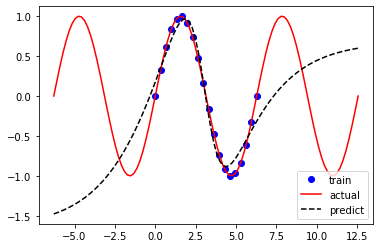

In [9]:
# generate prediction data
x = np.linspace(-2*np.pi,4*np.pi,100)
y = np.sin(x)
# scale input
X3 = x*s.scale_[0]+s.min_[0]
# predict
Y3P = model.predict(X3)
# unscale output
yp = (Y3P-s.min_[1])/s.scale_[1]

plt.figure()
plt.plot((X1-s.min_[0])/s.scale_[0], \
                 (Y1-s.min_[1])/s.scale_[1], \
                 'bo',label='train')
plt.plot(x,y,'r-',label='actual')
plt.plot(x,yp,'k--',label='predict')
plt.legend(loc='best')
plt.savefig('results.png')
plt.show()

In [ ]:
s.scale_